In [1]:
#All the necessary imports
%matplotlib inline
import pylab as pl
import numpy as np
from scipy import signal
import IPython.display

pl.rcParams['figure.figsize'] = (9,3)


def setup_plot(title, y_label='', x_label='', newfig=True):
    """Setup a proper plot."""
    if newfig:
        pl.figure()
    pl.margins(*(pl.array(pl.margins())+0.05))
    pl.title(title)
    pl.ylabel(y_label)
    pl.xlabel(x_label)

def add_top_axis(x_values, x_label=''):
    """Plot an additional x-axis at the top."""
    _, b = pl.rcParams['figure.figsize']
    pl.gca().title.set_position([.5, 1.18])
    ax1 = pl.gca()
    ax2 = ax1.twiny()
    ax2.margins(*(pl.array(ax1.margins())))
    ln, = ax2.plot(x_values, np.zeros_like(x_values)) # Create a dummy plot
    ln.remove()
    ax2.set_xlabel(x_label)
    
def download_and_load_audio(url, mono=True, factor_of_2_length=True):
    """Open or download audio and return it as an array."""
    import os
    import urllib
    import scipy.io
    from scipy.io import wavfile
    
    filename = os.path.split(url)[-1]
    #Download if path does not already exist
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url, filename)
    sample_frequency, signal_array = wavfile.read(filename)
    #Normalise signal and return
    if mono and len(signal_array.shape)==2:
        signal_array = np.sum(signal_array, axis=1)
    signal_array = signal_array/np.max([np.max(signal_array), -np.min(signal_array)])
    if factor_of_2_length:
        signal_array = signal_array[:2**np.floor(np.log2(len(signal_array))).astype('int')]
    
    return sample_frequency, signal_array

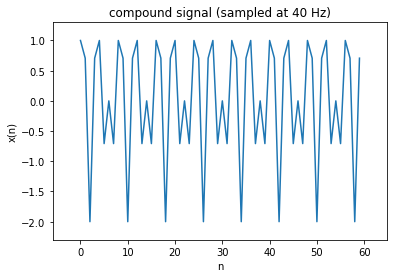

In [5]:
fs = 40
Ts = 1/fs
n = 60

t_axis = np.linspace(0, n * Ts, n, False)
s_axis = np.arange(0, n, 1)

x = (1 * np.sin(2 * 15 * np.pi * t_axis)) + (1 * np.cos(2 * 30 * np.pi * t_axis))

setup_plot(('compound signal (sampled at %d Hz)' % (fs)), "x(n)", "n")
pl.plot(s_axis, x)